# 京东用户购买部分商品行为分析

## 项目描述

用户研究是产品设计的第一步，其中以大量数据为支撑的用户行为分析尤为重要，这个项目我们采用京东用户对购买商品评价数据，深度分析用户行为和喜好,方便商家提供更好的服务.

### 数据清洗

In [2]:
#读取数据库数据
import pandas as pd
from pandas import DataFrame as df
Comment_data = pd.read_csv('data/JDComment_data.csv')  # 读取训练数据

In [3]:
# 查看前十条数据,默认5
Comment_data.head(10)

,用户ID,评论内容,会员级别,点赞数,回复数,得分,购买时间,手机型号
0,12439670683,手机款式新颖，金色靓丽。与安卓系统相比，运行速度快，的确有优势。内存256G，足够强大，相当...,铜牌会员,3,3,5,2019-02-07 21:42:16,Apple iPhone 8 Plus (A1864) 256GB 金色 移动联通电信4G手机
1,12304137881,红色特别版，拍照效果特别好，屏幕大，而且续航也很好，电量够用，跑分很高，秒杀一般的安卓，屏幕...,PLUS会员,0,1,5,2018-12-26 09:46:32,Apple iPhone 8 Plus (A1864) 256GB 金色 移动联通电信4G手机
2,12418777334,非常完美，机子是正品，外观没有其他人说的缝隙，昨天到手四个小时安装下载各种软件才用了45%的...,PLUS会员,6,2,5,2019-01-28 09:46:06,Apple iPhone 8 Plus (A1864) 256GB 金色 移动联通电信4G手机
3,12504176355,哈哈哈，不错，不错，给老婆买的，很有手感，有重感。不像别的轻飘飘的，么得感觉。很喜欢，我也终...,银牌会员,0,0,5,2019-03-02 23:45:34,Apple iPhone 8 Plus (A1864) 256GB 金色 移动联通电信4G手机
4,12064914592,今天终于入手了5999，外面检查完毕以后，然后就是检查序列号，发现都是对的，然后开机直接@，...,金牌会员,9,15,5,2018-10-31 17:40:57,Apple iPhone 8 Plus (A1864) 256GB 金色 移动联通电信4G手机
5,12294179781,反应很灵敏，金色真的很漂亮后面粉粉的，特别好看\n就是玻璃屏有点惊险，谁让它好看的，用惯了苹...,金牌会员,5,3,5,2018-12-23 14:39:42,Apple iPhone 8 Plus (A1864) 256GB 金色 移动联通电信4G手机
6,10962607452,很愉快的一次购物，双11活动抢购的。手机用起来很舒服。8p的外观没变，但是材质是玻璃的，特意...,金牌会员,3,1,5,2017-11-13 11:31:05,Apple iPhone 8 Plus (A1864) 256GB 金色 移动联通电信4G手机
7,12469136249,买来玩游戏的，游戏体验极好。手机是新的，用起来很流畅，表面也没什么问题。满意,PLUS会员,1,1,5,2019-02-20 10:33:33,Apple iPhone 8 Plus (A1864) 256GB 金色 移动联通电信4G手机
8,12400609939,18日下的单，19日拿到了，激活，非常好用，本意是想入手iPhone8，最后比较了下，果断8...,PLUS会员,3,0,5,2019-01-22 20:56:11,Apple iPhone 8 Plus (A1864) 256GB 金色 移动联通电信4G手机
9,11535080759,"帮朋友买的，连我都很喜欢，我都心动了，经典的梦想手机，我用过iPhone6s plus,现在...",PLUS会员,56,15,5,2018-05-30 16:49:28,Apple iPhone 8 Plus (A1864) 256GB 金色 移动联通电信4G手机


### 数据描述性分析

In [5]:
#查看没有评论的用户前几行数据
Comment_data[Comment_data['评论内容'] == '此用户未填写评价内容' ]

,用户ID,评论内容,会员级别,点赞数,回复数,得分,购买时间,手机型号
3985,12512647810,此用户未填写评价内容,铜牌会员,0,0,5,2019-03-05 15:44:19,Apple iPhone 8 Plus (A1864) 256GB 金色 移动联通电信4G手机
4002,12511539300,此用户未填写评价内容,金牌会员,0,0,5,2019-03-05 10:29:41,Apple iPhone 8 Plus (A1864) 256GB 金色 移动联通电信4G手机
4016,12510642159,此用户未填写评价内容,注册会员,0,0,5,2019-03-04 22:32:15,Apple iPhone 8 Plus (A1864) 256GB 金色 移动联通电信4G手机
4019,12510365973,此用户未填写评价内容,金牌会员,0,0,5,2019-03-04 21:05:51,Apple iPhone 8 Plus (A1864) 256GB 金色 移动联通电信4G手机
4059,12507908284,此用户未填写评价内容,银牌会员,0,0,5,2019-03-04 09:28:01,Apple iPhone 8 Plus (A1864) 256GB 金色 移动联通电信4G手机
...,...,...,...,...,...,...,...,...
21662,12405665157,此用户未填写评价内容,铜牌会员,0,0,5,2019-01-24 11:33:20,Apple iPhone 8 Plus 256GB 红色特别版 移动联通电信4G手机
21672,12402941862,此用户未填写评价内容,银牌会员,0,0,5,2019-01-23 15:13:28,Apple iPhone 8 Plus 256GB 红色特别版 移动联通电信4G手机
21674,12402597927,此用户未填写评价内容,银牌会员,0,0,5,2019-01-23 13:36:50,Apple iPhone 8 Plus 256GB 红色特别版 移动联通电信4G手机
21698,12397649891,此用户未填写评价内容,金牌会员,0,0,5,2019-01-22 00:38:15,Apple iPhone 8 Plus 256GB 红色特别版 移动联通电信4G手机


填充缺省值以及删除第一行

In [6]:
# 完整性分析
Comment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21716 entries, 0 to 21715
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   用户ID    21716 non-null  int64 
 1   评论内容    21716 non-null  object
 2   会员级别    21716 non-null  object
 3   点赞数     21716 non-null  int64 
 4   回复数     21716 non-null  int64 
 5   得分      21716 non-null  int64 
 6   购买时间    21716 non-null  object
 7   手机型号    21716 non-null  object
dtypes: int64(4), object(4)
memory usage: 1.3+ MB


发现数据无缺省值.

## 数据清洗


In [16]:
 #删除第一行
Comment_data.drop(index=0,axis=0)
#查看哪些列存在空值
Comment_data.isnull().any()

用户ID    False
评论内容    False
会员级别    False
点赞数     False
回复数     False
得分      False
购买时间    False
手机型号    False
dtype: bool

In [14]:
#Comment_data[Comment_data.isnull().values==True]
# 查看字段等于会员级别 或 评论内容 
# 修改数据
for col in Comment_data:
    if col == "会员级别" or col == "评论内容":
        Comment_data[col].fillna('', inplace=True)
    elif col == "用户ID":
        Comment_data[col].fillna('00000000000', inplace=True)
    else:
        Comment_data[col].fillna(0, inplace=True)
Comment_data.isnull().any()#查看是否进行了填充

用户ID    False
评论内容    False
会员级别    False
点赞数     False
回复数     False
得分      False
购买时间    False
手机型号    False
dtype: bool

In [17]:
#清空未评价信息
Comment_data[Comment_data['评论内容']=="此用户未填写评价内容"] = ""
print(len(Comment_data[Comment_data['评论内容']!=""])) #统计有效评论数

21091


In [18]:
#检验未评价
Comment_data[Comment_data['评论内容'] == '此用户未填写评价内容' ]

,用户ID,评论内容,会员级别,点赞数,回复数,得分,购买时间,手机型号


## 数据可视化及分析
### 会员等级编码

In [20]:
from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
# 会员等级分类
data = Comment_data[Comment_data['会员级别']!='']
value1 = array(data['会员级别'])
phone_type = Comment_data[Comment_data['手机型号']!='']
value2 = array(data['手机型号'])
# 手机型号分类
#整数编码
level_encoder = LabelEncoder()
phone_type_encode = LabelEncoder()
integer_level_encoded = level_encoder.fit_transform(value1)
integer_type_encoded = phone_type_encode.fit_transform(value2)

print(integer_level_encoded)
userLevel = level_encoder.classes_
print(level_encoder.classes_)

print(integer_type_encoded)
phone_type = phone_type_encode.classes_
print(phone_type_encode.classes_)

[6 0 0 ... 5 7 0]
['PLUS会员' 'PLUS会员[试用]' '企业会员' '注册会员' '金牌会员' '钻石会员' '铜牌会员' '银牌会员']
[0 0 0 ... 3 3 3]
['Apple iPhone 8 Plus (A1864) 256GB 金色 移动联通电信4G手机'
 'Apple iPhone 8 Plus (A1864) 256GB 银色 移动联通电信4G手机'
 'Apple iPhone 8 Plus (A1864) 64GB 深空灰色 移动联通电信4G手机'
 'Apple iPhone 8 Plus 256GB 红色特别版 移动联通电信4G手机']


### 购买时间处理

In [26]:
# 提取时间
hourList = []
month = []
year = []
useLessData = 0
for i in Comment_data['购买时间']:
    try:
        #print(str(i))
        hourList.append(str(i).split(' ')[1].split(':')[0])
        month.append(str(i).split(' ')[0].split('-')[1])
        year.append(str(i).split(' ')[0].split('-')[0])
    except:
        useLessData += 1
        
print('无效数据有%s条'%useLessData)
phone_year_encode = LabelEncoder()
year_encoded = phone_year_encode.fit_transform(year)
# 年种类
print(phone_year_encode.classes_)
# 打印数值编码
print(year_encoded)

无效数据有625条
['2017' '2018' '2019']
[2 1 2 ... 2 2 2]


In [27]:
import random
from pyecharts import options as opts
from pyecharts.charts import Bar

#　小时
attr = ["{}时".format(i) for i in range(24)]
#　数据
v1 = [hourList.count(str(_).rjust(2,'0')) for _ in range(24)]
bar = (
    Bar()
    .add_xaxis(attr)
    .add_yaxis("数量",v1)
    .set_global_opts(title_opts=opts.TitleOpts(title="手机购买时段"))
)
bar.render_notebook()

## 分析一天中不同时段消费者的手机购买情况，可以分析得出，大部分消费者在午时（10-12时）和晚上（20-22时）出现了消费高峰期，在此时段顾客购买商品的概率更大，他们浏览商品的机会更多

In [35]:
import numpy as np

v = [[]]
# 循环遍历会员级别类型
for level in level_encoder.classes_:
    print(level)
    df = Comment_data[Comment_data['会员级别'] == level]
    hourList = []
    month = []
    for i in df['购买时间']:
        try:
            #print(str(i).split(' ')[0].split('-')[1])
            # 相同会员等级购买月份添加到一块 便于求每月份数量
            month.append(str(i).split(' ')[0].split('-')[1])
        except:
            useLessData += 1
    # print(useLessData)
    data = []
    for _ in range(1, 13):
        if(_ < 10):
            data.append(month.count('0'+str(_)))
        else:
            data.append(month.count(str(_)))
    # print(data) 
    # 月份总数量
    v.append(data)
# print(v)
count = 1
v[count]

PLUS会员
PLUS会员[试用]
企业会员
注册会员
金牌会员
钻石会员
铜牌会员
银牌会员


[747, 995, 981, 256, 292, 396, 252, 304, 232, 372, 1404, 404]

In [36]:
# 求每个等级每月份总销售量
count = 1
for level in level_encoder.classes_:
    print(v[count])
    count+=1


[747, 995, 981, 256, 292, 396, 252, 304, 232, 372, 1404, 404]
[12, 151, 83, 4, 4, 0, 4, 4, 8, 4, 24, 0]
[76, 28, 4, 0, 4, 0, 4, 0, 0, 8, 4, 24]
[360, 502, 236, 0, 0, 0, 0, 0, 0, 0, 0, 20]
[572, 616, 651, 224, 228, 352, 208, 196, 204, 228, 912, 276]
[372, 426, 354, 136, 156, 272, 140, 116, 104, 268, 784, 220]
[285, 496, 228, 0, 0, 0, 0, 0, 0, 0, 0, 8]
[653, 782, 553, 176, 136, 300, 224, 212, 156, 124, 384, 156]


In [37]:
count = 1
v[count]
saleSum = 0.0
for level in level_encoder.classes_:
#     line.add(level, attr, v[count], mark_point=["average"], legend_pos ='right',legend_top ='7%')
    saleSum += np.mean(v[count])
    count += 1
count = 1
for level in level_encoder.classes_:
    print("%s所占比例%.2lf%%"%(level, np.mean(v[count])*100 / saleSum))
    count += 1


PLUS会员所占比例31.46%
PLUS会员[试用]所占比例1.41%
企业会员所占比例0.72%
注册会员所占比例5.30%
金牌会员所占比例22.13%
钻石会员所占比例15.87%
铜牌会员所占比例4.82%
银牌会员所占比例18.28%


In [39]:
# 导入折线图
from pyecharts.charts import Line
import numpy as np

count = 1
saleSum = 0.0
v[count]
attr = ["一月", "二月", "三月", "四月", "五月", "六月",'七月','八月','九月','十月','十一月','十二月']
line = ( 
    Line() 
    .add_xaxis(attr)
    .add_yaxis("PLUS会员", v[1])
    .add_yaxis("PLUS会员[试用]", v[2])
    .add_yaxis("企业会员", v[3])
    .add_yaxis("注册会员", v[4])
    .add_yaxis("金牌会员", v[5])
    .add_yaxis("钻石会员", v[6])
    .add_yaxis("铜牌会员", v[7])
    .add_yaxis("银牌会员", v[8])
    .set_global_opts(title_opts=opts.TitleOpts(title="等级分析")) #.render("line_base.html") 
)
for level in level_encoder.classes_:
    saleSum += np.mean(v[count])
    count += 1

count = 1

# 求每个等级购买量所占比
for level in level_encoder.classes_:
    print("%s所占比例%.2lf%%"%(level, np.mean(v[count])*100 / saleSum))
    count += 1


line.render_notebook()

PLUS会员所占比例31.46%
PLUS会员[试用]所占比例1.41%
企业会员所占比例0.72%
注册会员所占比例5.30%
金牌会员所占比例22.13%
钻石会员所占比例15.87%
铜牌会员所占比例4.82%
银牌会员所占比例18.28%


## 通过分析会员等级结论:结论:

### 通过分析上图可知，不论是哪种会员，他们在三月份前后以及十一月份前后购买手机的可能性最大，这可能大家新的一年想换一个新手机的想法有关，在这些月份进行手机推荐可能会有不错的收获。并且分析不同会员的购买情况可知，他们购买的频次降序排列为PLUS会员>金牌会员>银牌会员>钻石会员>PLUS会员（试用）> 企业会员。


### 分析原因，大致是因为PLUS会员大部分都属于高消费群体，他们购买这些价值昂贵的手机概率更大。因此，大致可以推断，这款手机的主要消费对象是京东商城的PLUS会员（31.46%）、金牌会员（22.13%）、银牌会员（18.28%）。

In [40]:
import matplotlib.pyplot as plt
# 导入词云库
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
 
data = Comment_data['评论内容'].tolist()
dataStr = ','.join(data)
# dataStr
# print(','.join(data))

In [41]:
# 自然语言处理:jieba
import jieba

# 添加自定义的中文语句
jieba.add_word('跑分')
jieba.add_word('很好')
textlist = jieba.lcut(dataStr)
# 通过键值对存储 计算单词出现数量
dict_ci = {}
for word in textlist:
    # 一个单词的不计算在内
    if len(word) == 1:
        continue
    else:
        dict_ci[word] = dict_ci.get(word,0) + 1 #返回指定键的值，如果键不在字典中返回默认值 None 或者设置的默认值。
# dict_ci


# for lien in dataStr:
#     textlist = jieba.lcut(lien)
#     textlist

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.614 seconds.
Prefix dict has been built successfully.


In [47]:
#　转化为列表生成云词
from pyecharts.charts import WordCloud
list_sum = [(key,value) for key,value in dict_ci.items()] 
# list_sum
WC = (
        WordCloud()
        # word_size_range: 单词字体大小范围
        .add("", list_sum, word_size_range=[20, 100], shape="cardioid")
        .set_global_opts(title_opts=opts.TitleOpts(title="用户评论"))
    )
WC.render_notebook()

从图中可以看出，存在一些无效数据，没有处理，比如hellip就是无效数据。并且标点符号的影响使得一些评论次数比较多的句子
显示了出来，这显然不太符合预期的词图效果。
下面去在去除一些冗余的数据之后，重新进行分词并生存词云

In [42]:
# 去杂
dataStr = dataStr.replace('hellip','')
dataStr = dataStr.replace('。','')
dataStr = dataStr.replace('，','').replace('！','').replace(',','').replace('&','').replace('...','')

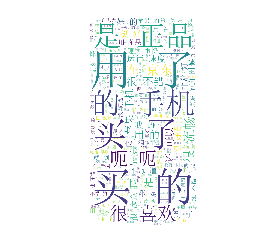

In [45]:
# -*- coding: utf-8 -*-
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
import os
backgroup_Image = plt.imread('front/phone.jpg') #笼罩图
wordlist = jieba.cut(dataStr, cut_all=False)
word_string = " ".join(wordlist)
wordcloud = WordCloud(font_path='front/simsun.ttc', background_color="white",mask = backgroup_Image, width=1000, height=860, margin=2).generate(word_string)
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('front/商品评论.jpg')

通过上面此图基本可以看出消费者对该款手机的整体评价，但其中可能还有一些刷单的情况，这些量无法控制，没法排除，因此还是要理性的看待一款手机综合性能。

In [46]:
# 求出每年的销售量
phone_type
Comment_data['购买时间'] = Comment_data['购买时间'].map(lambda x:x.split(' ')[0].split('-')[0])
# Comment_data['购买时间']
data1 = Comment_data[Comment_data['购买时间'] == '2017']
data2 = Comment_data[Comment_data['购买时间'] == '2018']
data3 = Comment_data[Comment_data['购买时间'] == '2019']
print(len(data1),len(data2),len(data3))

4284 9056 7751


In [47]:
# 导入饼图
from pyecharts.charts import Pie
from pyecharts.globals import ThemeType

pie = (
  Pie()
        .add(
        "",# 系列名称
        # 数据
        [['2017',len(data1)],["2018",len(data2)],["2019",len(data3)]],
        # 第一项室内半径,第二项外半径
        radius=["40%", "60%"],
            
        # 标签配置项
        label_opts=opts.LabelOpts(
            position="outside",# 标签位置
            formatter="{a|{a}}{abg|}\n{hr|}\n {b|{b}: }{c}  {per|{d}%}  ",# 标签显示样式
            background_color="#eee",# 背景颜色
            border_color="#aaa",# 边框颜色
            border_width=1,# 边框宽度
            border_radius=4,# 边框四角弧度
            rich={
                "a": {"color": "#999",
                      "lineHeight": 22,
                      "align": "center" #对齐方式
                     },
                "abg": {
                    "backgroundColor": "#e3e3e3",
                    "width": "100%",
                    "align": "right",
                    "height": 22,
                    "borderRadius": [4, 4, 0, 0],
                },
                "hr": {
                    "borderColor": "#aaa",
                    "width": "100%",
                    "borderWidth": 0.5,
                    "height": 0,
                },
                "b": {"fontSize": 16, "lineHeight": 33},
                # 百分比
                "per": {
                    "color": "#eee",# 字体颜色
                    "backgroundColor": "#334455",#背景颜色
                    "padding": [2, 4],
                    "borderRadius": 2,
                },
            },
        ),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="2017~2019年总销售量"))
)
pie.render_notebook()

# 其中通过分析会员等级与购买的关系，可以给为不同会员提供不同的产品做参考。分析评价内容可以大概可以推断出消费者对该产品的态度、以及哪些回复关注度比较高等等。分析购买时间可以了解到消费者集中的购买时间段。这些分析对商品广告的精准投放以及为消费者提供更个性化的服务提供了重要参考。